In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmm import continuous_observation_HMM as cHMM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
S = 3 #number of states
O = 1 #number of possible observations
A = np.zeros((S,S))
C = np.array([-2,0,2])
R = 1
p0 = np.ones(S)/S
for i in range(S):
    for j in range(S):
        if i == j:
            A[i,j] = 0.9
        else:
            A[i,j] = 0.1/(S-1)

In [3]:
hmm = cHMM(A,C,R,p0,S,O)

In [4]:
states,observations = hmm.generate_data(100)

In [5]:
print states
print observations

[1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-0.8067276030897554, 1.653842580578639, 0.21789241943483706, 1.3245171851722655, -0.16041875537237082, -0.2114723924535823, -0.9544303533722548, 0.9872516130506904, -0.07839773483604791, -0.017645488837383937, 1.7909225978017151, 3.702394739040806, 1.064527364559368, 1.8434718605681486, 1.5988823121591995, 3.2544350234633512, 2.3835631271897078, 2.885211791279495, 1.3564983505392907, 3.5549967460686576, 0.2369235635311724, 1.2269992481658534, 2.4693049749218354, 2.3269987672292047, 4.098909334329148, 1.6413960521881814, 3.3792648224392257, 2.9583623967569093, 1.172919754203678, 3.128978139588207, -0.02026944617979698, 1.6257215021099218, 2.10704616500805, 2.3317883160883928, 2.233929450381

In [6]:
t = range(100)

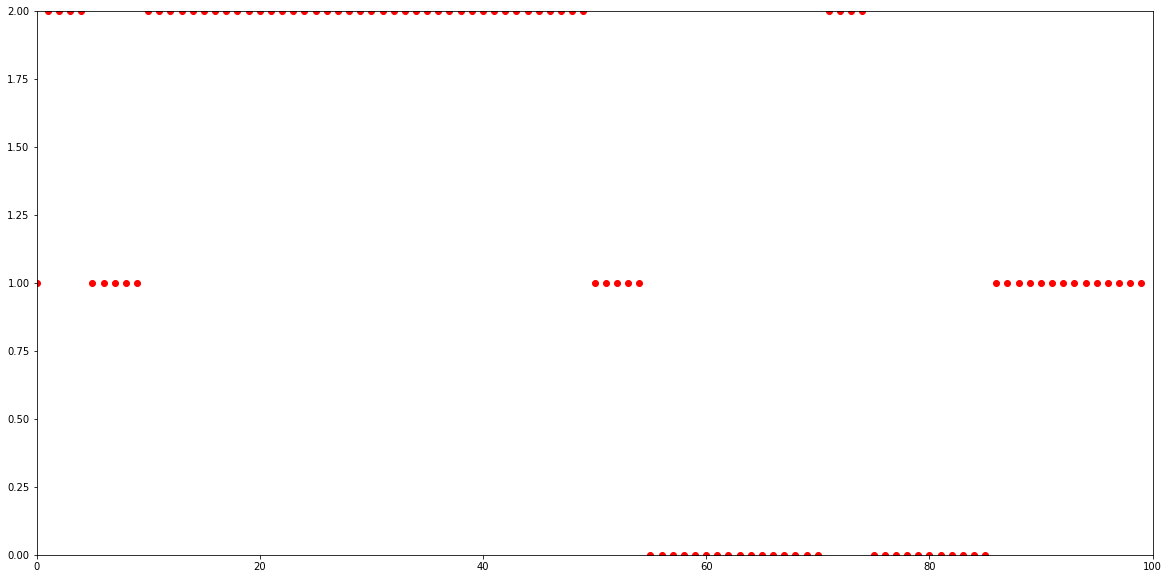

In [7]:
plt.figure(figsize=(20,10))
plt.plot(t, states, 'ro')
plt.axis([0,100,0,2])
plt.show()

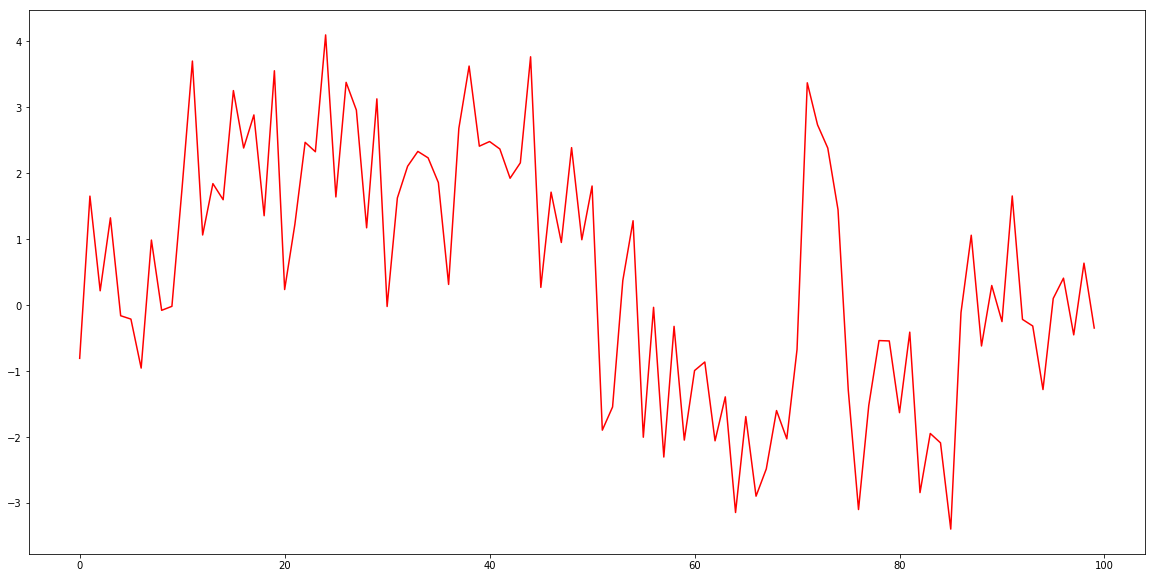

In [8]:
plt.figure(figsize=(20,10))
plt.plot(observations, 'r')
#plt.axis([0,100,0,10])
plt.show()

In [9]:
update, predict = hmm.forward_pass(observations)

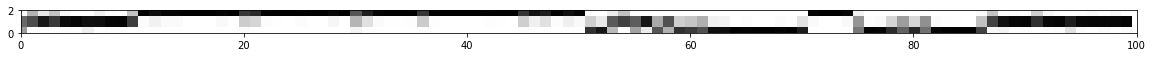

In [10]:
alfa = utils.normalize_exp(update)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

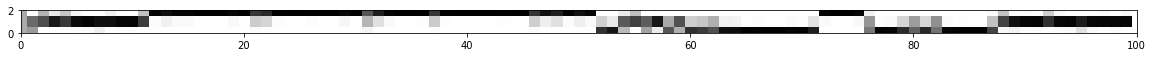

In [11]:
alfa = utils.normalize_exp(predict)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [12]:
_, postdict = hmm.backward_pass(observations)

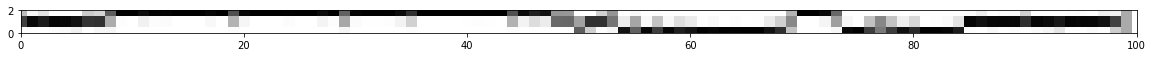

In [13]:
beta = utils.normalize_exp(postdict)
plt.figure(figsize=(20,10))
plt.imshow(beta, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [14]:
log_gamma = hmm.forward_backward(observations)

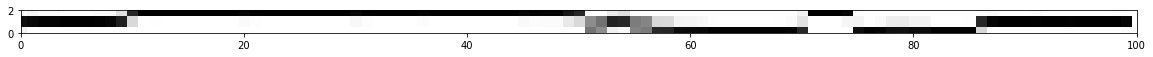

In [19]:
gamma = utils.normalize_exp(log_gamma)
plt.figure(figsize=(20,10))
plt.imshow(gamma, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [20]:
max_path = hmm.viterbi(observations)

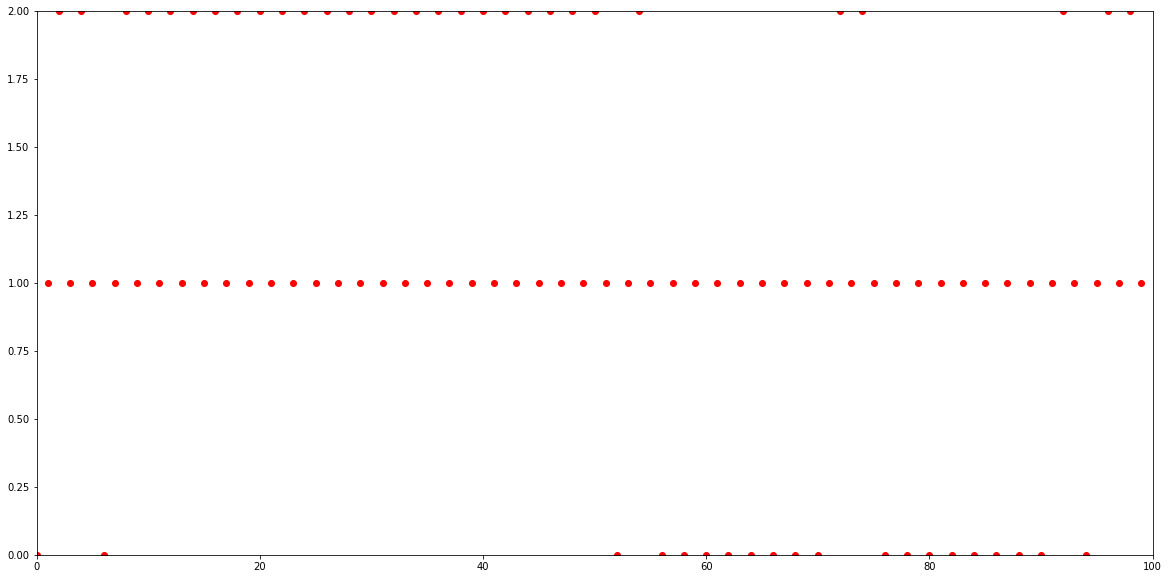

In [21]:
plt.figure(figsize=(20,10))
plt.plot(t, max_path, 'ro')
plt.axis([0,100,0,2])
plt.show()

In [22]:
_,y = hmm.generate_data(500)

In [23]:
A_estimated, C_estimated, R_estimated, pi_estimated = hmm.parameter_estimation_em(y,20)

In [24]:
print A_estimated

[[0.92959018 0.03869524 0.05515134]
 [0.01537053 0.95069994 0.00782238]
 [0.05503929 0.01060482 0.93702627]]


In [25]:
print C_estimated

[-1.9532338   0.09644898  2.19145145]


In [26]:
print R_estimated

1.0283814023045257


In [27]:
print pi_estimated

[2.77854538e-87 3.50281156e-29 1.00000000e+00]


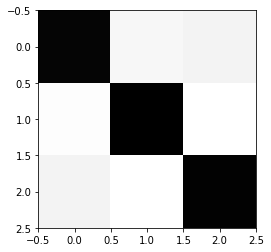

In [28]:
plt.imshow(A_estimated, cmap=plt.cm.binary)
plt.show()